# README

Este notebook es solo para leer el log que genera el trader.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [3]:
raw_filepath = '/Users/renero/Documents/SideProjects/trader/output/log_10k.csv'
raw_data = pd.read_csv(raw_filepath, sep='|')
new_colnames = [col_name.strip() for col_name in raw_data.columns]
new_cols_dict = dict(zip(raw_data.columns, new_colnames))
data = raw_data.rename(columns=new_cols_dict)
data.head()

,t,price,forecast,budget,€.flow,value,net.Val,shares,action,reward,state
0,0,354.0,288.2,2200.0,0.0,0.0,0.0,0.0,buy,0.0,EVEN_DOWN_NOTHAVE_PRED_UNK_NOSTPLOS
1,1,338.2,294.5,1846.0,-354.0,338.2,-15.8,1.0,buy,0.0,LOSE_DOWN_YESHAVE_PRED_UNK_NOSTPLOS
2,2,333.7,298.5,1507.8,-692.2,667.4,-24.9,2.0,buy,0.0,LOSE_DOWN_YESHAVE_PRED_OOK_NOSTPLOS
3,3,345.6,299.9,1174.0,-1026.0,1036.8,10.9,3.0,sell,-1.0,LOSE_DOWN_YESHAVE_PRED_NOK_NOSTPLOS
4,4,343.4,302.9,1519.7,-680.4,686.7,6.4,2.0,buy,0.0,LOSE_DOWN_YESHAVE_PRED_OOK_NOSTPLOS


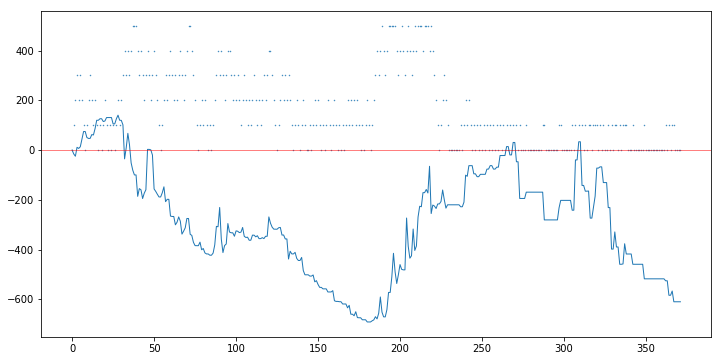

In [44]:
plt.figure(figsize=(12,6))
plt.plot(data.loc[:, 'net.Val'], linewidth=1)
plt.scatter(range(len(data.shares)), data.shares*100, s=0.2)
plt.axhline(y=0, c='r', linewidth=0.5)
plt.show()

Creo una columna booleana dependiendo de si el estado contiene 'STOPLOSS'

In [59]:
data['stoploss'] = data.state.apply(lambda v: v.find('STOPLOSS') != -1)

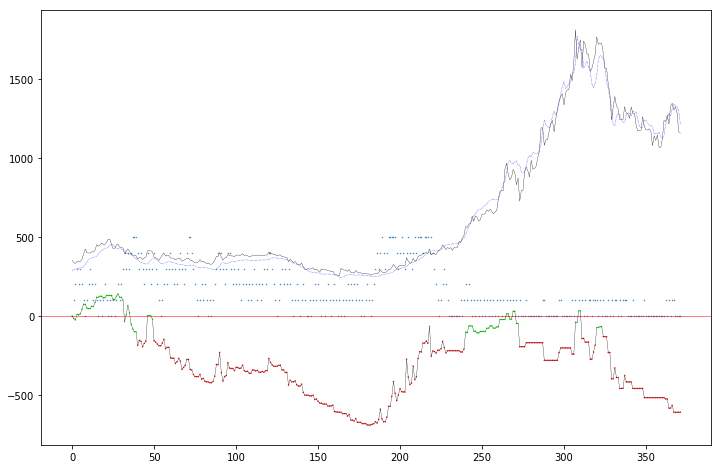

In [93]:
cmap = colors.ListedColormap(['#00ff00','#ff0000'])

plt.figure(figsize=(12,8))
plt.scatter(range(data.shape[0]), data.loc[:, 'net.Val'], 
            marker='.', c=data.stoploss, cmap=cmap, s=1)
plt.plot(data.loc[:, 'net.Val'], linewidth=0.3, c='k')
plt.plot(data.loc[:, 'price'], linewidth=0.3, c='k')
plt.plot(data.loc[:, 'forecast'], linewidth=0.5, c='blue', linestyle=':')
plt.scatter(range(len(data.shares)), data.shares*100, s=0.2)
plt.axhline(y=0, c='r', linewidth=0.5)
plt.show()

Now, without STOPLOSS Signal

In [94]:
raw_filepath = '/Users/renero/Documents/SideProjects/trader/output/log_10k_nostoploss.csv'
raw_data = pd.read_csv(raw_filepath, sep='|')
new_colnames = [col_name.strip() for col_name in raw_data.columns]
new_cols_dict = dict(zip(raw_data.columns, new_colnames))
data = raw_data.rename(columns=new_cols_dict)
data.head()

,t,price,forecast,budget,€.flow,value,net.Val,shares,action,reward,state
0,0,354.0,288.2,2200.0,0.0,0.0,0.0,0.0,buy,0.0,EVEN_DOWN_NOTHAVE_PRED.UNKNW
1,1,338.2,294.5,1846.0,-354.0,338.2,-15.8,1.0,buy,0.0,LOSE_DOWN_YESHAVE_PRED.UNKNW
2,2,333.7,298.5,1507.8,-692.2,667.4,-24.9,2.0,sell,-1.0,LOSE_DOWN_YESHAVE_PRED.CRECT
3,3,345.6,299.9,1841.5,-358.6,345.6,-12.9,1.0,sell,-1.0,LOSE_DOWN_YESHAVE_PRED.WRONG
4,4,343.4,302.9,2187.1,-12.9,0.0,-12.9,0.0,none,-1.0,LOSE_DOWN_NOTHAVE_PRED.CRECT


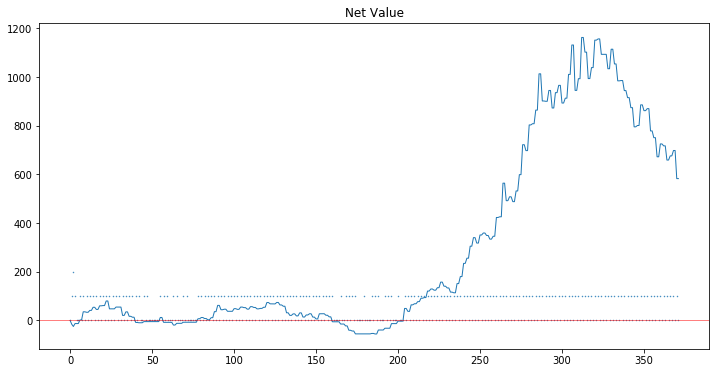

In [98]:
plt.figure(figsize=(12,6))
plt.plot(data.loc[:, 'net.Val'], linewidth=1)
plt.title('Net Value')
plt.scatter(range(len(data.shares)), data.shares*100, s=0.2)
plt.axhline(y=0, c='r', linewidth=0.5)
plt.show()

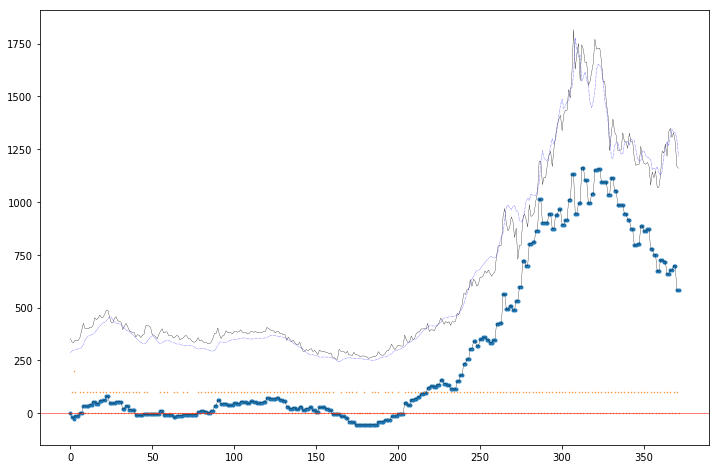

In [95]:
plt.figure(figsize=(12,8))
plt.scatter(range(data.shape[0]), data.loc[:, 'net.Val'], marker='.')
plt.plot(data.loc[:, 'net.Val'], linewidth=0.3, c='k')
plt.plot(data.loc[:, 'price'], linewidth=0.3, c='k')
plt.plot(data.loc[:, 'forecast'], linewidth=0.5, c='blue', linestyle=':')
plt.scatter(range(len(data.shares)), data.shares*100, s=0.2)
plt.axhline(y=0, c='r', linewidth=0.5)
plt.show()